
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 23rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please make sure that **your filename includes your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1a - Stochastic Gradient Descent (25pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook.


2. (15pts) Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'rmsprop'(Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and RMSProp. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and RMSProp (6 plots total).


3. (2pts) Report the MSE at the end of 15 epochs for both combinations.


4. (3pts) Based on the experiments, which of the 3 techniques allowed for larger initial setting of the learning_rate? Why?


# Notes on SGD with momentum
Momentum helps accelerate SGD in relevant direction and dampens the oscillations. It tries to maintain the direction in which the gradient vector was already pointing and adjusts the direction slowly with the new gradients. The steps can be listed below :
1. v[t] = mu * v[t-1] - (learning_rate)*(gradient)
2. w = w + v

Set mu = 0.90. Initialize v with zeros.


# Notes on RMSProp
RMSProp (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate.  In particular, it uses a moving average of squared gradients as cache. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = (decay_rate)*(cache) + (1 - decay_rate)*(gradients^2) 
2. weights = weights - ((learning_rate)/sqrt(cache+1e-6))*gradients

Use decay_rate = 0.90. Initialize cache with zeros.

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook.

Populating the interactive namespace from numpy and matplotlib


C:\Users\bandi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'test', 'shuffle', 'gradient']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


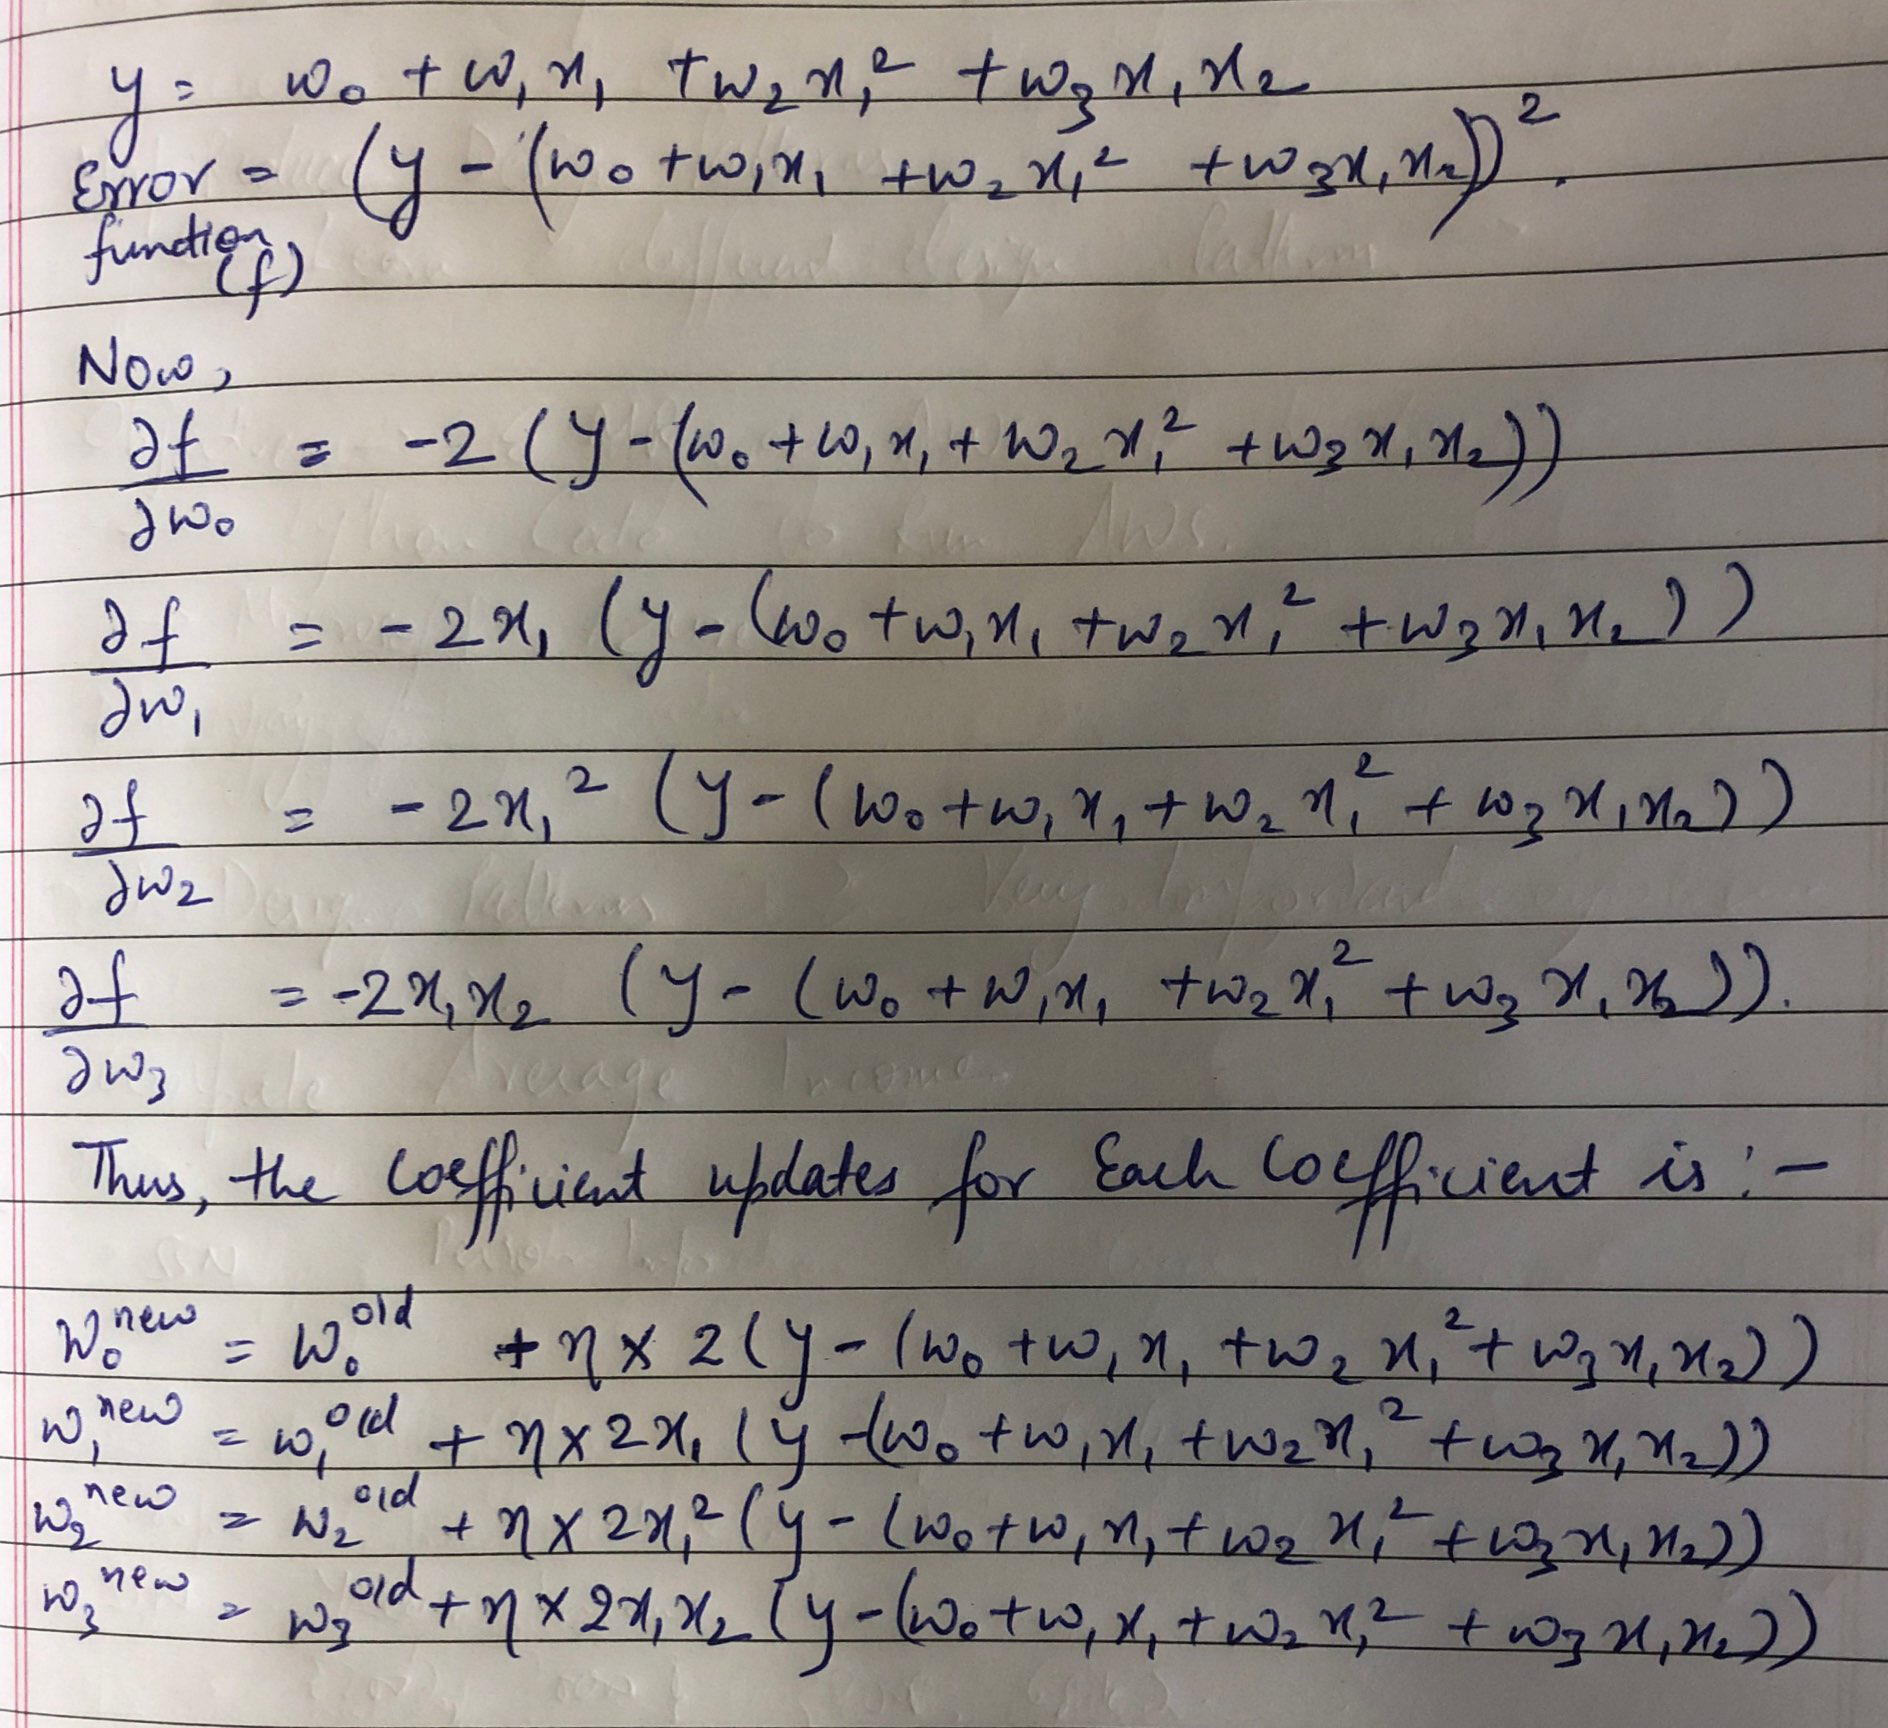

In [456]:
%pylab inline
from PIL import Image
Image.open("Question_1.jpg")

## 2. Write Python code for an SGD solution to the non-linear model

In [3]:
samples = pd.read_csv('Samples.csv')

In [4]:
# Addiing additional columns to the data frame based on the non-linear model.
import copy
samples_copy = copy.deepcopy(samples)
samples_copy['x1*x1'] = samples['x1']*samples['x1']
samples_copy['x1*x2'] = samples['x1']*samples['x2']

#Dropping first column as we don't need it.
samples_copy = samples_copy.drop(samples_copy.columns[0],axis = 1)

X = np.array(samples_copy[['x1','x1*x1','x1*x2']])
y = samples_copy['y']

In [77]:
#Class for SGD Regression

class GradientDescentRegression:
    def __init__ (self,learning_rate=0.0001,regularization_constant=10.0,epochs=15):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.regularization_constant = regularization_constant
        self.epochs = epochs
        
    #Defining function fit. By default it will take sgd as the update rule.            
    def fit(self, X, y, update_rule = 'sgd', mu = 0.9, decay_rate = 0.9):
        """
        Fit model coefficients
        Also, check if X is a 1D or 2D array
        
        """
        
        # Randomly assigning 1 as the first column. This will make sure that the first weight vector is initialized properly. 
        # This allows us to treat the bias as a trainable parameter within the weight matrix.
        X = np.c_[np.ones((X.shape[0])), X]        
        coef = np.ones((X.shape[1]))
        
        self.regularization_constant = np.repeat(self.regularization_constant, X.shape[1])
        self.regularization_constant[0] = 0
                     
        if update_rule == 'sgd_momentum':
            v = np.zeros((X.shape[1]))
        elif update_rule == 'rmsprop':
            cache = np.zeros((X.shape[1]))
            
                               
        for j in range (self.epochs):
            
            for i in range(len(X)):
                #X[i] = np.array(X[i]).reshape(1,-1) 
                
                        
                #Calculating Gradient and close form solution
                predicted_y = np.array(X[i]).reshape(1,-1).dot(coef)
                error = y[i] - predicted_y
                gradient = -2*error.dot(np.array(X[i]).reshape(1,-1)) + 2*self.regularization_constant.dot(coef)
                
                #Update weights depending on the choice of update rule
                if update_rule == 'sgd':
                    coef = coef - self.learning_rate*gradient
                elif update_rule == 'sgd_momentum':
                    v = v*mu  - self.learning_rate*(gradient)
                    coef = coef + v
                elif update_rule == 'rmsprop':
                    cache = decay_rate*cache + (1 - decay_rate)*(gradient**2)
                    coef = coef - ((self.learning_rate)/np.sqrt(cache*(10**(-6))))*gradient
                else:
                    print ("Please enter the correct update_rule. Correct update_rule include the following -\n")
                    print ("sgd","sgd_momentum","rmsprop")
                    break                    
                
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
                        
        return coef
         
    def predict(self, X):
        """
        Output the model prediction
        """
        
        #Check if X is 1D array
        if len(X.shape)==1:
            X = X.reshape(1,-1)
        
        return self.intercept_ +  X.dot(self.coef_) 
    
    def mean_squared_error(self,y_true,y_predicted):
        """
        Output the mean squared error
        """
        mse = np.mean((y_true - y_predicted)**2)
        return mse

In [78]:
learning_rate = [0.0001, .001, .01, 0.1, 1, 10, 100]
regularization_constant = [0,10,100]

def calculate_min_mse(X,y,sgd_variant,learning_rate,regularization_constant):
    df = pd.DataFrame(columns = ['mse','learning_rate','regularization'])
        
    #Looping over all the input parameters
    for k in learning_rate:
        for j in regularization_constant:
            sgd = GradientDescentRegression(learning_rate = k, regularization_constant=j,epochs = 15)
            w = sgd.fit(X,y,update_rule = sgd_variant)
            y_predicted = sgd.predict(X)
            mse = sgd.mean_squared_error(y,y_predicted)
            df.loc[len(df)] = [mse,k,j]
                        
    min_mse = df[df['mse']==df['mse'].min()]
    return min_mse

sgd_min_mse = calculate_min_mse(X,y,'sgd',learning_rate,regularization_constant)
sgd_momentum_min_mse = calculate_min_mse(X,y,'sgd_momentum',learning_rate,regularization_constant)
rmsprop_min_mse = calculate_min_mse(X,y,'rmsprop',learning_rate,regularization_constant)

C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in multiply
C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in multiply
C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in add
C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in add
C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in subtract
C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in multiply


In [79]:
print ('\nThe best combination of learning rate and regularization for SGD is \n\n',\
       sgd_min_mse.to_string(index=False),'\n\n')
print ('The best combination of learning rate and regularization for SGD-Momentum is \n\n',\
       sgd_momentum_min_mse.to_string(index=False),'\n\n')
print ('The best combination of learning rate and regularization for RMSProp is \n\n',\
       rmsprop_min_mse.to_string(index=False),'\n')


The best combination of learning rate and regularization for SGD is 

 mse  learning_rate  regularization
0.067935          0.001             0.0 


The best combination of learning rate and regularization for SGD-Momentum is 

 mse  learning_rate  regularization
0.084631         0.0001             0.0 


The best combination of learning rate and regularization for RMSProp is 

 mse  learning_rate  regularization
0.156538         0.0001             0.0 



In [80]:
# Getting coefficients and mse for each echo in the best case scenario for all the update rules
epochs = 15
sgd_best_learning_rate = sgd_momentum_min_mse.iloc[0]['learning_rate']
sgd_best_regularization = sgd_momentum_min_mse.iloc[0]['regularization']

def calculate_mse_coef_for_epochs(X,y,sgd_variant,learning_rate,regularization_constant,epochs=15):
    
    df = pd.DataFrame(columns = ['epochs','weights','mse'])

    for i in range(epochs):
        sgd = GradientDescentRegression(learning_rate = learning_rate,\
                                    regularization_constant=regularization_constant,\
                                    epochs = i+1)
    
        w = sgd.fit(X,y,update_rule = sgd_variant)
        y_predicted = sgd.predict(X)
        mse = sgd.mean_squared_error(y,y_predicted)
        df.loc[len(df)] = [i+1,w,mse]
    return df
    
sgd_mse_coef_epochs = calculate_mse_coef_for_epochs(X,y,'sgd',sgd_min_mse.iloc[0]['learning_rate'],\
                                     sgd_min_mse.iloc[0]['regularization'])
sgd_momentum_mse_coef_epochs = calculate_mse_coef_for_epochs(X,y,'sgd_momentum',sgd_momentum_min_mse.iloc[0]['learning_rate'],\
                                     sgd_momentum_min_mse.iloc[0]['regularization']) 
rmsprop_mse_coef_epochs = calculate_mse_coef_for_epochs(X,y,'rmsprop',rmsprop_min_mse.iloc[0]['learning_rate'],\
                                     rmsprop_min_mse.iloc[0]['regularization'])

#### Plotting MSE and Parameter Updates vs. Epochs

Text(0.5,1,'Parameters vs Epoch for RMSProp')

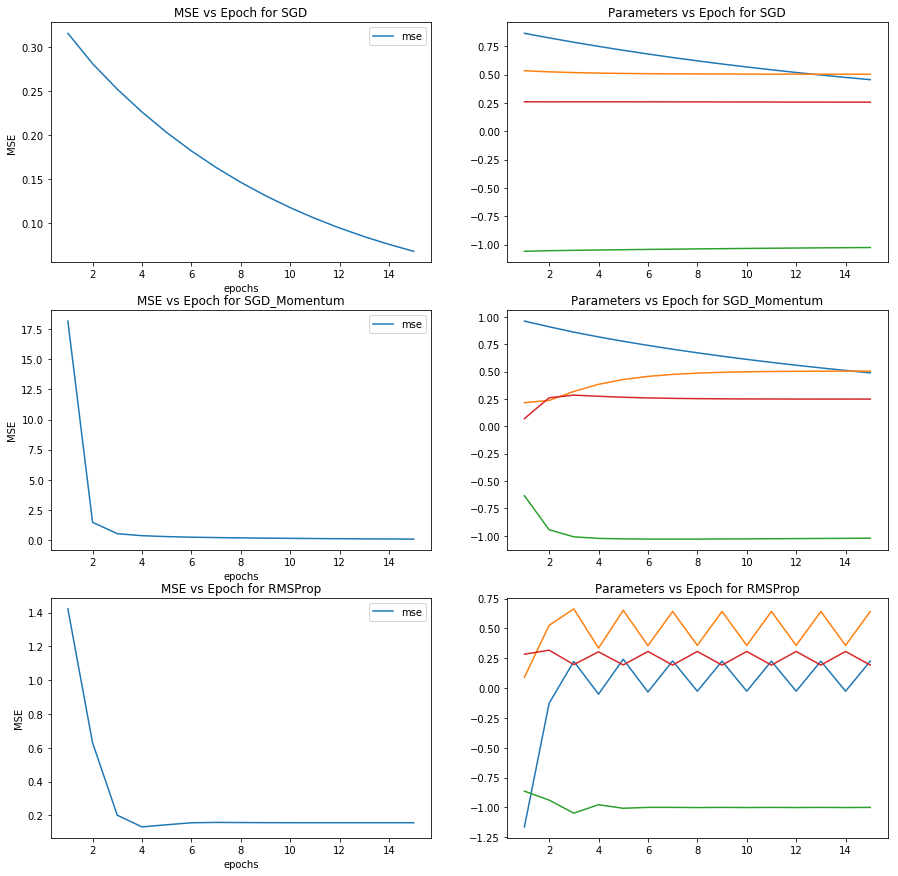

In [104]:
# Plotting MSE vs Epochs for the 3 cases.

fig, axes = plt.subplots(nrows=3, ncols=2, sharey = False, figsize = (15,15))
sgd_mse_coef_epochs.plot('epochs','mse',ax=axes[0,0])
axes[0,0].set_ylabel('MSE')
axes[0,0].set_title('MSE vs Epoch for SGD')

axes[0,1].plot(range(1,16),np.stack((sgd_mse_coef_epochs['weights'].values)))
axes[0,1].set_title('Parameters vs Epoch for SGD')

sgd_momentum_mse_coef_epochs.plot('epochs','mse',ax=axes[1,0])
axes[1,0].set_ylabel('MSE')
axes[1,0].set_title('MSE vs Epoch for SGD_Momentum')

axes[1,1].plot(range(1,16),np.stack((sgd_momentum_mse_coef_epochs['weights'].values)))
axes[1,1].set_title('Parameters vs Epoch for SGD_Momentum')

rmsprop_mse_coef_epochs.plot('epochs','mse',ax=axes[2,0])
axes[2,0].set_ylabel('MSE')
axes[2,0].set_title('MSE vs Epoch for RMSProp')

axes[2,1].plot(range(1,16),np.stack((rmsprop_mse_coef_epochs['weights'].values)))
axes[2,1].set_title('Parameters vs Epoch for RMSProp')

## 3. Report the MSE at the end of 15 epochs for both combinations.

In [111]:
print('Minimum MSE at the end of 15 epochs from SGD is',sgd_min_mse.iloc[0]['mse'])
print('Minimum MSE at the end of 15 epochs from SGD_Momentum is',sgd_momentum_min_mse.iloc[0]['mse'])
print('Minimum MSE at the end of 15 epochs from RMSProp is',rmsprop_min_mse.iloc[0]['mse'])

Minimum MSE at the end of 15 epochs from SGD is 0.06793481950619042
Minimum MSE at the end of 15 epochs from SGD_Momentum is 0.08463066016076069
Minimum MSE at the end of 15 epochs from RMSProp is 0.15653846838167945


## 3. Based on the experiments, which of the 3 techniques allowed for larger initial setting of the learning_rate? Why?

RMSProp allowed a larger initial setting of the learning_rate. It did not return infinitie or very large values even at higher learning_rates. This is because in RMSProp divides the learning rate by an exponentially decaying average of squared gradients. This thus helps in taking a larger initial learning rate and reduces it when the gradient is higher, while helping in a faster convergence.

# Question 2 - Multi-layer perceptron Regressor (15 pts)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python;
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.


We will use the OpenCL gemm kernel performance prediction dataset for this problem; https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 30** and **test_size = 0.25**.

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

data = pd.read_csv('sgemm_product.csv') 
data['target'] = 0.25*(data['Run1 (ms)'] + data['Run2 (ms)']+ data['Run3 (ms)'] + data['Run4 (ms)'])
y = data['target']
y = y.as_matrix()
X = data.drop(['target','Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(181200, 14) (181200,) (60400, 14) (60400,)


C:\Users\bandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y. 

1) (5pts) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=30, learning_rate_init = 0.005
    
Now, consider the following settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* 
   
   (b) *hidden_layer_sizes = (10,)*
   
   (c) *hidden_layer_sizes = (30,)*
   
   (d) *hidden_layer_sizes = (50,)*
   
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model.
   
   
2) (5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


3) (5pts) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using below conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* valu;:

   (a) *hidden_layer_sizes = (1,)* 
   
   (b) *hidden_layer_sizes = (5,)*
   
   (c) *hidden_layer_sizes = (10,)*

## Answer

## 1.

In [136]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
from sklearn.metrics import mean_squared_error
n_folds = 5
k_fold = KFold(n_folds)

hidden_units_rmse = {}

hidden_layers = [2,10,30,50]
for i in hidden_layers:
    avg_rmse = 0
    for train, test in k_fold.split(X_train_scaled):
            
        neural_net = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,\
                              batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes=(i,))
                
        X_train_scaled_kfold = np.array(X_train_scaled)[train]
        X_test_scaled_kfold = np.array(X_train_scaled)[test]
        
        neural_net.fit(X_train_scaled_kfold,y_train[train])
        y_test_predicted = neural_net.predict(X_test_scaled_kfold)
        avg_rmse = avg_rmse + np.sqrt(mean_squared_error(y_train[test],y_test_predicted))
    hidden_units_rmse[i] = avg_rmse/n_folds

In [140]:
for i in hidden_layers:
    print ('RMSE for hidden layer size', i, 'is', hidden_units_rmse[i])

RMSE for hidden layer size 2 is 272.34535531119684
RMSE for hidden layer size 10 is 218.21144358200723
RMSE for hidden layer size 30 is 192.38295052765704
RMSE for hidden layer size 50 is 181.39579764959234


##### 2. (5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

In [327]:
hidden_layers = [2,10,30,50]
hidden_units_rmse_train = {}
hidden_units_rmse_test = {}
for i in hidden_layers:    
    neural_net = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,\
                          batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes=(i,))
    neural_net.fit(X_train_scaled,y_train)
    y_train_predicted = neural_net.predict(X_train_scaled)
    y_test_predicted = neural_net.predict(X_test_scaled)
    hidden_units_rmse_train[i] =  np.sqrt(mean_squared_error(y_train,y_train_predicted))
    hidden_units_rmse_test[i] = np.sqrt(mean_squared_error(y_test,y_test_predicted))

In [537]:
for i in hidden_layers:
    print ('Train RMSE for hidden layer size', i, 'is', hidden_units_rmse_train[i])
    print ('Test RMSE for hidden layer size', i, 'is', hidden_units_rmse_test[i])

Train RMSE for hidden layer size 2 is 242.5485462422022
Test RMSE for hidden layer size 2 is 238.24746550730634
Train RMSE for hidden layer size 10 is 226.89900779973956
Test RMSE for hidden layer size 10 is 223.2650031144957
Train RMSE for hidden layer size 30 is 193.85496098475775
Test RMSE for hidden layer size 30 is 190.39690686186165
Train RMSE for hidden layer size 50 is 183.03031872043383
Test RMSE for hidden layer size 50 is 180.52038249880786


In [332]:
print ('The best model among the 4 models is the one with the hidden layer equal to',\
       min(hidden_units_rmse_test, key=hidden_units_rmse_test.get))

The best model among the 4 models is the one with the hidden layer equal to 50


Clearly as the number of hidden layers increase the accuracy of the prediction increases. The model with least error is the one with the highest number of hidden layers (50). However if we increase the number of hidden layers by a large amount, then the data will overfit, leading to lower trainig error. However this could lead to a higher test error.

###### 3) (5pts) MLPRegressor has a built-in attribute loss_curve_ which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as my_model you can call it as my_model.loss_curve_ (example). Plot three curves using below conditions (a, b, c) in one figure, where X-axis is epoch number and Y-axis is squared root of loss_curve_ valu;:

In [506]:
hidden_layers = [1,5,10]
loss_curve={}

for i in hidden_layers:    
    neural_net_new = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,\
                          batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes=(i,))
    neural_net_new.fit(X_train_scaled,y_train)
    loss_curve[i] = np.sqrt(neural_net_new.loss_curve_)

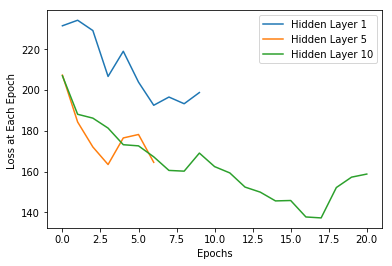

In [507]:
for i in hidden_layers:
    plt.plot(pd.Series(loss_curve[i]))
    
plt.xlabel ('Epochs')
plt.ylabel('Loss at Each Epoch ')
plt.legend(['Hidden Layer 1', 'Hidden Layer 5', 'Hidden Layer 10'])

# Question 3 - [Kaggle Competition] Mercedes-Benz Greener Manufacturing (25 pts)

In this problem, we are going to explore a Kaggle competition: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing). Your goal is to obtain the best score you can in this competition.

The first step is to make a Kaggle account. Then find this competition and read the competition details and the description of the dataset. 

I have converted the categorical variables to numbers. The dataset is available as **'q3_train.csv'** and **'q3_test.csv'** along with the assignment. Please use this dataset for building your models. Upload your predicted values to kaggle to get the score.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any outlier and remove them).
 * Impute the missing values (if any).
 
2. Predictive Models. 
 * You have to create three models: Lasso regression, Ridge regression and multilayer perceptron. For Lasso and Ridge regression, optimize the alphas using cross validation. Multilayer perceptron can have one hidden layer. You may try other predictive models to get better scores (optional). 
3. Get a score of 0.51 or higher on the **Private Leaderboard**. Take a screenshot of your private score after submission as proof. You can click My Submissions tab to see the history of your submissions. It will show both Public Leaderboard & Private Leaderboard score. Your highes score should be visible in the screenshot.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

## Answer

In [462]:
# Loading train and test data
train_data = pd.read_csv('q3_train.csv') 
test_data = pd.read_csv('q3_test.csv')

In [485]:
print(train_data.shape)
print(test_data.shape)

(4209, 378)
(4209, 377)


### Data Pre-processing

##### a. Let us check if there are any missing values in our data

In [480]:
# Check null in train and test data
print ('The total numer of null values in train data are', train_data.isnull().sum().sum())
print ('The total numer of null values in test data are', test_data.isnull().sum().sum())

The total numer of null values in train data are 0
The total numer of null values in test data are 0


Clearly, there are no missing values in the trainig or test data.

#### b. Let us check if there are any outliers in our predictor

Text(0.5,0,'index')

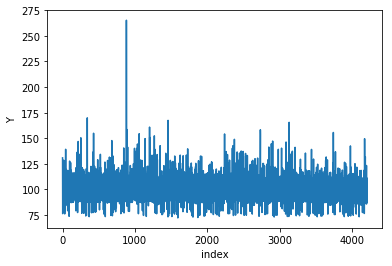

In [487]:
train_data['y'].plot()
plt.ylabel('Y')
plt.xlabel('index')

Looking at the above graph, we can see that there is an outlier value of y. We will thus remove this data data point.

In [608]:
mean_y = np.mean(train_data['y'])
sd_y = np.std(train_data['y'])

# Removing all the values which are <= Mean + 3*std. deviation
train_new = train_data[train_data['y'] <= mean_y+3*sd_y]
test_new = test_data.drop(['ID'],axis=1)

### Predictive Models

##### a. Lasso Regression

In [595]:
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV

X = train_new.drop(['ID','y'],axis=1)
Y = train_new['y']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

n_folds = 5
k_fold = KFold(n_folds)
lasso_alphas =  10**np.linspace(10,-6,100)*0.5
lasso_avg_r2_score = {}

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha,tol=.1)
    avg_r2_score = 0
    for train, test in k_fold.split(X_train):
        lasso.fit(X_train.iloc[train], Y_train.iloc[train])
        avg_r2_score = avg_r2_score + r2_score(Y_train.iloc[test], lasso.predict(X_train.iloc[test])) 
    lasso_avg_r2_score[alpha] = avg_r2_score / n_folds

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The above code calculates the best alpha which maximizes R square. I used this alpha to run the model on the validation data set. Once I was confident about the right set of parameters and alpha, I re-ran the lasso regression on the test data. I then exported the predictions and uploaded to Kaggle to get the predicted R square. 

In [623]:
best_alpha_lasso = max(lasso_avg_r2_score, key=lasso_avg_r2_score.get)
lasso_clf = Lasso(alpha=best_alpha_lasso,tol=.1)#, max_iter=100000)#,tol=1)
lasso_clf.fit(X_train, Y_train)
pred = lasso_clf.predict(X_test)
mean_r2_score = r2_score(Y_test, pred)
print('R Square for Lasso on validation data set is',  mean_r2_score)

R Square for Lasso on validation data set is 0.6382260588924433


In [624]:
lasso_clf = Lasso(alpha=best_alpha_lasso,tol=.1)#, max_iter=100000)#,tol=1)
lasso_clf.fit(X, Y)
pred = lasso_clf.predict(test_new)
new_df_kaggle = pd.DataFrame(data = {'ID':np.array(test_data['ID']) ,'Y':pred})
new_df_kaggle.to_csv('mercedes_lasso.csv', header = True, index = False)

##### b. Ridge Regression

In [625]:
X = train_new.drop(['ID','y'],axis=1)
Y = train_new['y']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

n_folds = 5
k_fold = KFold(n_folds)
ridge_alphas =  10**np.linspace(10,-6,100)*0.5
ridge_avg_r2_score = {}

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha,tol=.1)
    avg_r2_score = 0
    for train, test in k_fold.split(X_train):
        ridge.fit(X_train.iloc[train], Y_train.iloc[train])
        avg_r2_score = avg_r2_score + r2_score(Y_train.iloc[test], ridge.predict(X_train.iloc[test])) 
    ridge_avg_r2_score[alpha] = avg_r2_score / n_folds

In [627]:
best_alpha_ridge = max(ridge_avg_r2_score, key=ridge_avg_r2_score.get)
ridge_clf = Ridge(alpha=best_alpha_ridge,tol=.1)#, max_iter=100000)#,tol=1)
ridge_clf.fit(X_train, Y_train)
pred = ridge_clf.predict(X_test)
mean_r2_score = r2_score(Y_test, pred)
print('R Square for Ridge on validation data set is',  mean_r2_score)

ridge_clf = Ridge(alpha=best_alpha_ridge,tol=.1)#, max_iter=100000)#,tol=1)
ridge_clf.fit(X, Y)
pred = ridge_clf.predict(test_new)
new_df_kaggle = pd.DataFrame(data = {'ID':np.array(test_data['ID']) ,'Y':pred})
new_df_kaggle.to_csv('mercedes_ridge.csv', header = True, index = False)

R Square for Ridge on validation data set is 0.6345211864751459


##### c. Multilayer Perceptron

In [679]:
mlp_neural_net = MLPRegressor(activation = 'identity', solver = 'sgd', learning_rate='constant', random_state=42,\
                          batch_size=25, learning_rate_init = 0.00001, hidden_layer_sizes=(3,))
mlp_neural_net.fit(X,Y)

y_test_predicted = mlp_neural_net.predict(test_new)
new_df_kaggle = pd.DataFrame(data = {'ID':np.array(test_data['ID']) ,'Y':y_test_predicted})
new_df_kaggle.to_csv('mercedes_multilayer_perceptron.csv', header = True, index = False)

### R Square Scores

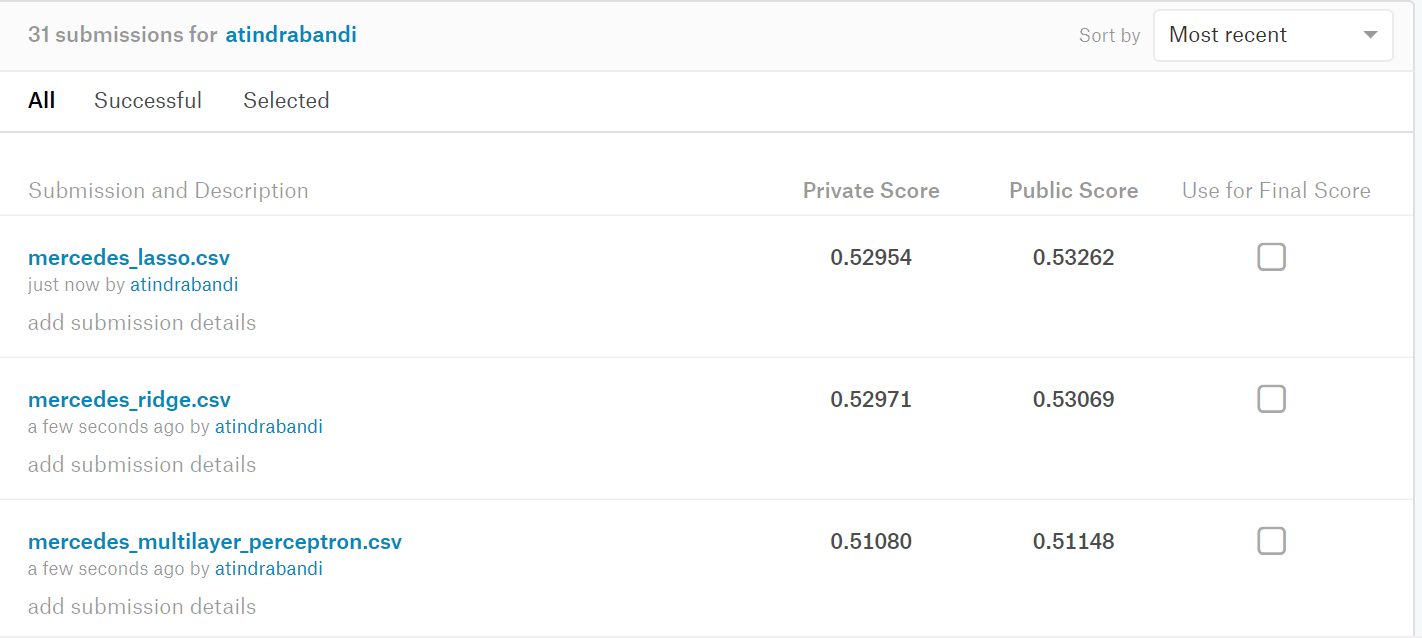

In [685]:
Image.open("Mercedes.png")

I first cleansed the data and performed lasso, ridge, multilayer perceptron. I used k-fold cross validation to choose the optimal alpha for Lasso and Ridge and a 3 layered hidden layer for MLP. Overall, I got the best result for Lasso Regrssion. 
When I was trying to create the model without removing outliers, it gave me a R score of less than 0.51 on the training data set. That's when I realized the imporance of removing outliers which improved the performance of my model.

**I however tried to improve the R$^2$ by running different kinds of model. By using XG Boost, I was able to increase the R$^2$ to 0.546**

In [694]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
model_xgboost = XGBRegressor()
model_xgboost.fit(X,Y)
y_test_predicted = model_xgboost.predict(test_new)
new_df_kaggle = pd.DataFrame(data = {'ID':np.array(test_data['ID']) ,'Y':y_test_predicted})
new_df_kaggle.to_csv('mercedes_xgboost.csv', header = True, index = False)

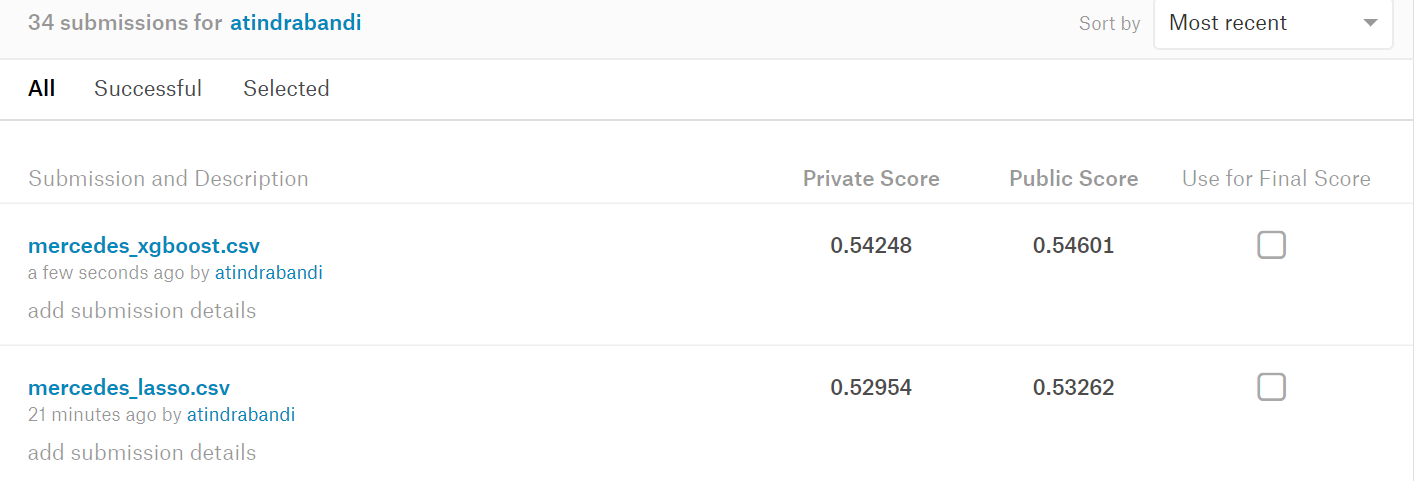

In [695]:
Image.open("Mercedes_xgboost.png")

# Question 4 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

## Answer

a.) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

* **Class Priors (P(C$_{1}$)** : It is the probability of a class prior to seeing the data (before some evidence is taken into account)
* **Class conditional likelihood (P(X|C$_{1}$))** : It is the lkelihood of a data point X occuring in a class say C$_{1}$.
* **Posterior probability (P(C$_{1}$|X))** : It is the revised probability of a class after taking into consideration the new information. i.e., the revised probability of class C$_{1}$ when we know that x has occured.

The relationship between them is given by -
$$P(C_{i}|x) = \frac{P(C_{i}) * P(x|C_{i})}{P(x_{i})}$$

##### b.)Mathematically derive the (optimal) Bayes decision boundary for this problem.


At the decision boundary- <br>
$P(C_{1}|x_{1},x_{2}) = P(C_{2}|x_{1},x_{2})$ <br>

or <br>

$ln(P(x_{1},x_{2}|C_{1})) + ln(P(C_{1})) = ln(P(x_{1},x_{2}|C_{2})) + ln(P(C_{2}))$ <br>

$\frac{-1}{2}*[(x_{1} - 40)^{2}*(x_{2} - 27)^{2}] + ln(0.2) = \frac{-1}{2}*[(x_{1} - 16)^{2} + (x_{2} - 20)^{2}] + ln(0.8)$ <br>

$\frac{-1}{2}*((x_{1} - 16) + x_{1} - 40)*(x_{1} - 16 - x_{1} + 40) + (x_{2} - 20 + x_{2} - 27)*(x_{2} - 20 - x_{2} + 27)) = 1.3864$ <br>

$(48x_{1} - 1344 + 14x_{2} - 329) = 2.7728$ <br>

$24x_{1} + 7x_{2} = 837.88$ <br>


**The decision boundary for salary is as per the equation given above.** <br>

c.) (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

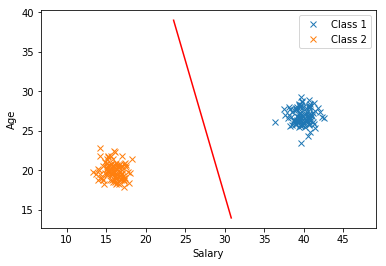

In [134]:
mean = [40, 27]
cov = [[1, 0], [0, 1]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x',label = 'Class 1')
plt.axis('equal')

mean = [16, 20]
cov = [[1, 0], [0, 1]]


x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x',label = 'Class 2')
plt.axis('equal')


x2 = np.array(list(range(14,40,1)))
x1 = (837.886 - 7*x2)/24.0
plt.plot(x1, x2, color = 'red')

plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend(loc = 'best')